![Tools](images/third_parties/tools.jpg)

Photo by [Alexander Andrews](https://unsplash.com/photos/c91LS-JK7cw?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText) on [Unsplash](https://unsplash.com/search/photos/tools?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText)

# Motivación

En la fecha de elaboración de estos apuntes existen **172749 proyectos** disponibles en el directorio de paquetes de Python [PyPI (Python Package Index)](https://pypi.org/).

Esto quiere decir que tenemos a nuestra disposición una ingente cantidad de librerías con las que cubrir prácticamente cualquier necesidad de desarrollo.

Ahí donde el propio lenguaje o la librería estándar no llega, la comunidad Python ha hecho un esfuerzo por liberar proyectos que pueden solucionar nuestro problema, o al menos, parte.

# Guión

1. Requests.
2. Pillow.
3. Beautiful Soup.
4. QR Code.
5. Numpy + Pandas.
6. Django y Flask.

# Requests
---

# HTTP para Humanos

[Requests](http://docs.python-requests.org/en/master/) promete (y cumple) ser una librería HTTP elegante y simple en Python hecha para seres humanos.

## Instalación

Si manejamos el sistema de entornos virtuales, podemos ejecutar:

![Install requests](images/third_parties/install-requests.png)

# Un ejemplo práctico

[Nexchange](https://nexchange2.docs.apiary.io/) es una API pública sobre criptomonedas. Vamos a utilizar `requests` para obtener distintos datos:

In [1]:
import requests

url = 'https://api.nexchange.io/en/api/v1/currency/'

response = requests.get(url)

print('Status code:\n', response.status_code, end='\n\n')
print('Content-type:\n', response.headers['Content-Type'], end='\n\n')
print('Content:\n', response.content[:500], end='\n\n')

Status code:
 200

Content-type:
 application/json

Content:
 b'[{"code":"LTC","name":"litecoin","min_confirmations":6,"is_crypto":true,"minimal_amount":"0.02000000","maximal_amount":"3000.00000000","is_base_of_enabled_pair":true,"is_quote_of_enabled_pair":false,"has_enabled_pairs":true,"is_base_of_enabled_pair_for_test":true,"is_quote_of_enabled_pair_for_test":true,"has_enabled_pairs_for_test":true,"withdrawal_fee":"0.01000000"},{"code":"SEK","name":"SEK","min_confirmations":null,"is_crypto":false,"minimal_amount":"0.01000000","maximal_amount":"1.00000000",'



## Utilizando la respuesta en formato *json*

Como hemos visto, el atributo `content` de la respuesta del método *get* contiene una cadena de texto representando un objeto *json*. Para facilitarnos su manejo, existe un método en *requests* para convertirlo directamente a *json*:

In [2]:
url = 'https://api.nexchange.io/en/api/v1/currency/'

response = requests.get(url)
currencies = response.json()
print(f'Hay {len(currencies)} criptomonedas diferentes en la API')
currencies[0]

Hay 58 criptomonedas diferentes en la API


{'code': 'LTC',
 'name': 'litecoin',
 'min_confirmations': 6,
 'is_crypto': True,
 'minimal_amount': '0.02000000',
 'maximal_amount': '3000.00000000',
 'is_base_of_enabled_pair': True,
 'is_quote_of_enabled_pair': False,
 'has_enabled_pairs': True,
 'is_base_of_enabled_pair_for_test': True,
 'is_quote_of_enabled_pair_for_test': True,
 'has_enabled_pairs_for_test': True,
 'withdrawal_fee': '0.01000000'}

## Encontrando el cambio

Supongamos que tenemos **3.14 Litecoins LTC** y queremos saber su valor en **Bitcoins BTC**.

Después de consultar la [documentación del punto de entrada para obtener el precio](https://nexchange2.docs.apiary.io/#reference/0/get-price/get-price), vemos que hay que construir una URL con parámetros GET:

In [3]:
url = 'https://api.nexchange.io/en/api/v1/get_price/LTCBTC/?amount_base=3.14'

response = requests.get(url)
response.json()

{'amount_base': 3.14,
 'amount_quote': 0.04739191,
 'timestamp': 1553428080.754466,
 'price': 0.01509296,
 'pair': {'base': 'LTC', 'quote': 'BTC'},
 'max_amount_base': 321.76537364,
 'max_amount_quote': 4.86752235,
 'min_amount_base': 0.02,
 'min_amount_quote': 0.00045136}

## Simplificando el paso de parámetros GET

Si nos fijamos en la *url* que hemos utilizado `https://api.nexchange.io/en/api/v1/get_price/LTCBTC/?amount_base=3.14` vemos que estamos pasando un parámetro `amount_base` en la petición GET.

*Requests* nos permite incluir los parámetros en forma de diccionarios:

In [4]:
url = 'https://api.nexchange.io/en/api/v1/get_price/LTCBTC/'
payload = {'amount_base': 3.14}

response = requests.get(url, params=payload)
response.json()

{'amount_base': 3.14,
 'amount_quote': 0.04739191,
 'timestamp': 1553428081.019151,
 'price': 0.01509296,
 'pair': {'base': 'LTC', 'quote': 'BTC'},
 'max_amount_base': 321.76537364,
 'max_amount_quote': 4.86752235,
 'min_amount_base': 0.02,
 'min_amount_quote': 0.00045136}

# 💡 Ejercicio

Utilizando *requests* y llamadas a la API pública https://exchangeratesapi.io/, calcule el valor en euros de 5 dólares canadienses.

In [23]:
# Escriba aquí su solución

# Pillow
---

# Manejando imágenes

[Pillow](https://pillow.readthedocs.io/en/stable/) es el *"friendly fork"* de PIL (Python Imaging Library). Aporta funcionalidades para abrir, manejar y guardar ficheros en formato imagen.

## Instalación

Si manejamos el sistema de entornos virtuales, podemos ejecutar:

![Install Pillow](images/third_parties/install-pillow.png)

#  Ejemplo: Descargando imágenes desde APIs

Juntando la librería `requests` con `Pillow` podemos atacar una API pública como [Lorem Picsum](https://picsum.photos/) y mostrar la imagen descargada *"on the fly"*:

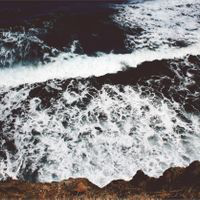

In [5]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://picsum.photos/200/?random'
response = requests.get(url)
Image.open(BytesIO(response.content))

# Ejemplo: Manipulando imágenes

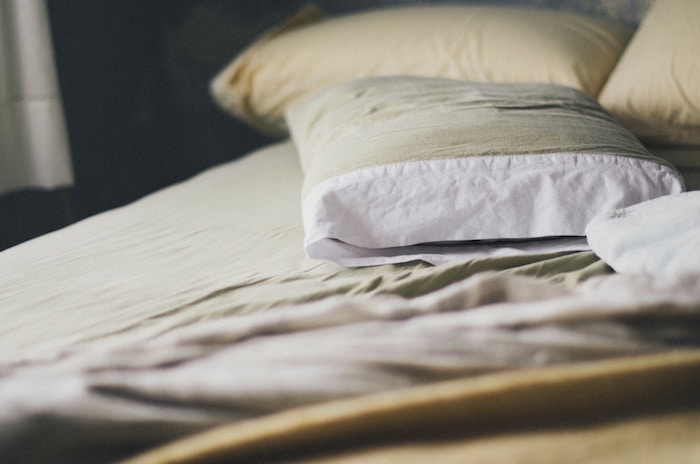

In [6]:
# Photo by Martin Castro on Unsplash
image = Image.open('images/third_parties/pillow.jpg')
image

## Recortando la imagen

In [7]:
image.size

(700, 464)

Detalle de la almohada:

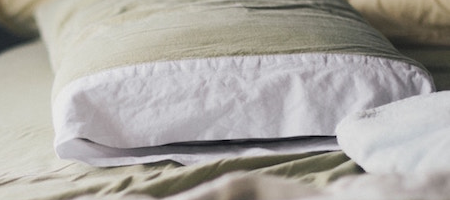

In [8]:
image2 = image.crop((250, 100, 700, 300))
image2

## Aplicando filtros a la imagen

En *Pillow* existen [distintos filtros](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html) que podemos aplicar sobre la imagen:

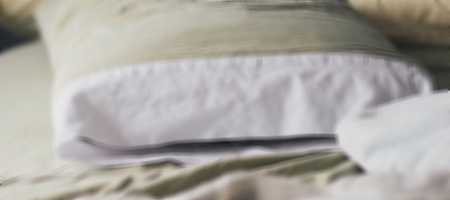

In [9]:
from PIL import ImageFilter

image2.filter(ImageFilter.BLUR)

## Rotando una imagen

Supongamos que queremos rotar 45 grados el recorte anterior:

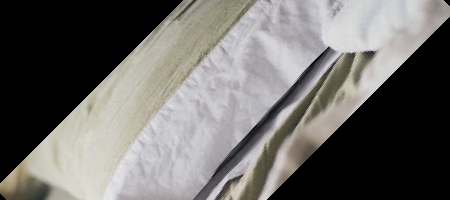

In [10]:
image2.rotate(45)

# 💡 Ejercicio

Partiendo de [la portada de Stranger Things](resources/strangerthings_cover.jpg), obtenga la siguiente imagen utilizando métodos de la librería *Pillow*:

![Hopper](resources/strangerthings_hopper.jpg)

Transformaciones:
- [Recorte](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.crop)
- [Blanco y negro](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.convert)
- [Flip](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.transpose)

In [25]:
# Escriba aquí su solución

# Beautiful Soup
---

# Extrayendo datos de la web

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) es una librería de Python que permite extraer datos de ficheros HTML y XML. Permite navegar, buscar y modificar el árbol sintáctico.

## Instalación

Si manejamos el sistema de entornos virtuales, podemos ejecutar:

![Install Pillow](images/third_parties/install-beautifulsoup.png)

# Ejemplo: Listado de series de Netflix

Vamos a intentar generar un listado con todos los títulos de series que aparecen en la web de *Netflix*.

En primer lugar analizamos la web https://www.netflix.com/es/browse/genre/839338 abriendo las *DevTools* de Google Chrome, o el inspector de elementos de tu navegador favorito. Podemos observar lo siguiente:

![Devtools Netflix](images/third_parties/devtools-netflix.png)

## Descarga de la web

Aquí vamos a hacer uso de *requests* para descargarnos el código de la web que nos interesa:

In [12]:
from bs4 import BeautifulSoup

response = requests.get('https://www.netflix.com/es/browse/genre/839338')
html_doc = response.text

soup = BeautifulSoup(html_doc, 'html.parser')

soup.title

<title>Originales de Netflix | Sitio oficial de Netflix</title>

Hemos construido un objeto *BeautifulSoup* a partir del código fuente de la página utilizando un *parser HTML*. Además hemos mostrado el nombre del título de la web de una forma muy sencilla.

## Acceso a los títulos

Como hemos visto al principio del ejemplo, debemos buscar todos los elementos *span* que contentan la clase *nm-collections-title-name*:

In [21]:
netflix_series = [span.string for span in soup.find_all('span', class_='nm-collections-title-name')]
netflix_series = list(set(netflix_series))
print(f'Hay un total de {len(netflix_series)} series')
netflix_series[:10]

Hay un total de 537 series


['Los 3 de abajo: Cuentos de Arcadia',
 'Insatiable',
 'Fe de etarras',
 'The Do-Over',
 'Señores de la droga',
 'Dirty John',
 'Amor carnal',
 'Los detectives de la casa del árbol',
 'Roxanne Roxanne',
 'El niño que domó el viento']

Estamos utilizando el método `find_all` para encontrar todas las ocurrencias que nos interesan. Además de esto hemos aprovechado la potencia de las listas por comprensión. Por último quitamos los duplicados creando un conjunto. Mostramos las 10 primeras series.

# 💡 Ejercicio

Partiendo de [la web de Stranger Things](https://www.netflix.com/es/title/80057281) y utilizando métodos de la librería *Beautiful Soup*, imprima el listado de actores y actrices de la serie.

In [24]:
# Escriba aquí su solución

# QR Code
---

# Generando códigos QR desde Python

[QR Code Generator](https://github.com/lincolnloop/python-qrcode) es una librería de Python que permite generar imágenes con códigos QR.

## Instalación

Si manejamos el sistema de entornos virtuales, podemos ejecutar:

![Install Pillow](images/third_parties/install-qrcode.png)

# Ejemplo

Generar código QR para la URL de una serie de Netflix:

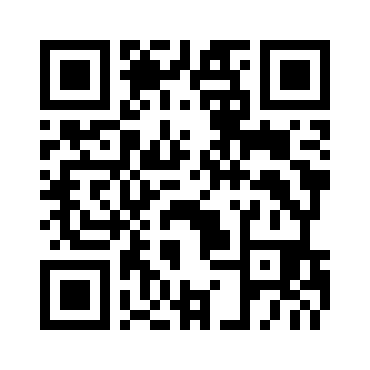

In [22]:
import qrcode

# URL de la serie 'The Good Place'
url = 'https://www.netflix.com/es/title/80113701'

image = qrcode.make(url)
image

# Numpy + Pandas
---

# Librerías científicas

- [Numpy](http://www.numpy.org/) es el paquete fundamental para computación científica en Python.
- [Pandas](https://pandas.pydata.org/) es una librería de alto rendimiento para análisis de datos en Python.

![Numpy + Pandas](images/third_parties/numpy_pandas.png)

# Flask y Django
---

# Desarrollo web en Python

- [Flask](http://flask.pocoo.org/) es un micro-framework para desarrollo web en Python.
- [Django](https://www.djangoproject.com/) es un framework web de alto nivel en Python que se centra en un desarrollo ágil y un diseño claro y pragmático.

![Flask y Django](images/third_parties/flask_django.png)